In [79]:
# load necessary packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.io import fits
from scipy.stats import norm

In [80]:
# load fits cube file and image data
cube_file = r'C:/Users/Linh/Downloads/millar blanchaer group/cred2 er characterization/data/bias data/-40.0C_0.00022_400.fits'
cube_data = fits.getdata(cube_file)
# check dimensions
print(cube_data.shape) # 50 640x512 images

(50, 512, 640)


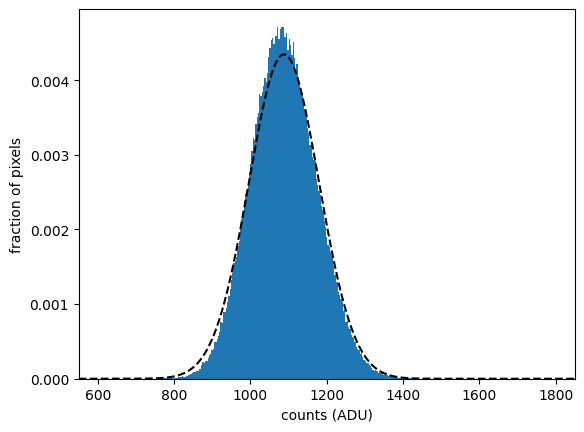

In [84]:
# average the 50 images and plot histogram of pixel values
avg_image = np.mean(cube_data, axis=0)
avg_image_hist = plt.hist(avg_image.flatten(), bins='auto', density=True)

# plot gaussian distribution b/c pixel values are near-gaussian
x = np.linspace(np.min(avg_image),np.max(avg_image),100000)
plt.plot(x, norm.pdf(x, np.mean(avg_image), np.std(avg_image)), '--', label='gaussian distribution', color='k')

# labels and stuff
plt.xlabel('counts (ADU)')
plt.ylabel('fraction of pixels')
plt.xlim(550,1850)
plt.savefig('bias_full_frame.png', dpi=300, transparent=True, bbox_inches='tight')

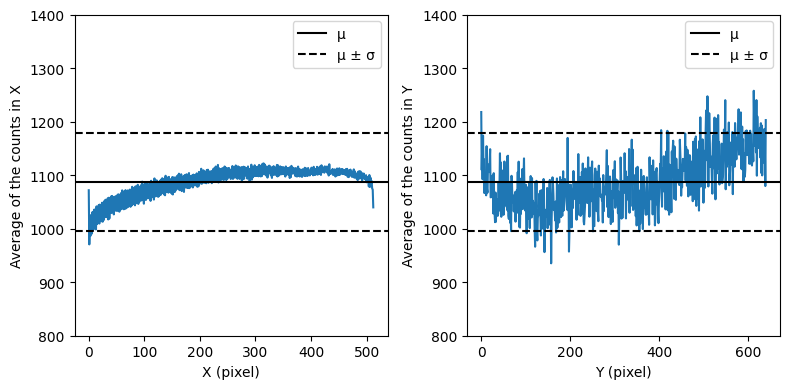

<Figure size 640x480 with 0 Axes>

In [82]:
# calculate row and column averages
avg_row_counts = np.mean(avg_image, axis=1)
avg_col_counts = np.mean(avg_image, axis=0)

# make plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

# plot average counts along rows
ax1.plot(np.linspace(0, 512, num=512),avg_row_counts)
ax1.axhline(y=np.mean(avg_image), color='k', label='μ')
ax1.axhline(y=np.mean(avg_image) + np.std(avg_image), color='k', linestyle='--', label='μ ± σ')
ax1.axhline(y=np.mean(avg_image) - np.std(avg_image), color='k', linestyle='--')

ax1.set_xlabel('X (pixel)')
ax1.set_ylabel('Average of the counts in X')
ax1.set_ylim(800,1400)
ax1.legend()

# plot average counts along columns
ax2.plot(np.linspace(0, 640, num=640), avg_col_counts)
ax2.axhline(y=np.mean(avg_image), color='k', label='μ')
ax2.axhline(y=np.mean(avg_image) + np.std(avg_image), color='k', linestyle='--', label='μ ± σ')
ax2.axhline(y=np.mean(avg_image) - np.std(avg_image), color='k', linestyle='--')

ax2.set_xlabel('Y (pixel)')
ax2.set_ylabel('Average of the counts in Y')
ax2.set_ylim(800, 1400)
ax2.legend()

plt.tight_layout()
plt.show()
plt.savefig('bias_rows_cols.png', dpi=300, transparent=True, bbox_inches='tight')


In [83]:
print('Min:', np.min(avg_image))
print('Max:', np.max(avg_image))
print('Mean:', np.mean(avg_image))
print('Stdev:', np.std(avg_image))

Min: 0.0
Max: 16380.0
Mean: 1087.7567999267578
Stdev: 91.82299853116409
